In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv("vgsales.csv")


In [61]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Data description

In this data set there are 11 columns. Their names and data types as follows:

* **Rank** - Ranking of overall sales, integer

* **Name** - The games name, object

* **Platform** - Platform of the games release (i.e. PC,PS4, etc.), object

* **Year** - Year of the game's release, float

* **Genre** - Genre of the game ,object

* **Publisher** - Publisher of the game

* **NA_Sales** - Sales in North America (in millions)

* **EU_Sales** - Sales in Europe (in millions)

* **JP_Sales** - Sales in Japan (in millions)

* **Other_Sales** - Sales in the rest of the world (in millions)

* **Global_Sales** - Total worldwide sales.

#### Checking for missing values


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [63]:
df.describe(include= 'object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


Rank column is useless as index already exists

In [64]:
df.drop("Rank", axis = 1, inplace = True)

In [65]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

There are missing values in year and publisher column


In [66]:
df.shape

(16598, 10)

In [67]:
df.Year.isnull().sum()/16598 * 100


1.6327268345583803

In [68]:
df.Publisher.isnull().sum()/16598 * 100

0.3494396915290999

Since missing values are not in high percentage, dropping them will have minimal effect on insights

In [69]:
df.dropna(inplace = True)

In [70]:
df.shape

(16291, 10)

After dropping values, confirming that tehere are no null values left

In [71]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Year is in object form changing it to suitable data type int for analysis

In [72]:
df.Year = df.Year.astype('int')

In [73]:
df.Year.dtype

dtype('int32')

### Checking for Outliners

In [74]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


On examining Sales columns we can see that many columns have a lot of difference between 75th quantile and max hence confirming using box plots

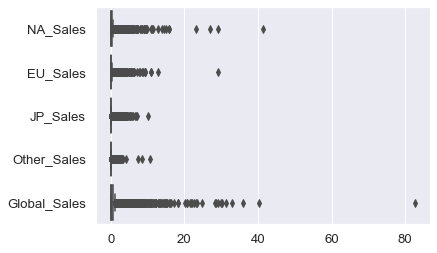

In [75]:
sns.boxplot(data=df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]], orient="h")
plt.show()

As is visible from above boxplot there are outliners in NA_Sales , and Global_Sales lets have a look at them

In [76]:
df[df.NA_Sales ==df.NA_Sales.max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [77]:
df[df.Global_Sales  == df.Global_Sales.max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


As is visible the outliner in both column is the same entry but is not an error or outliner as wii sports is an **iconic game** and hence must not be **removed**

### Univariate analysis


In [80]:
#total number of games 
df.Name.value_counts().sum()

16291

In [81]:
#total games released by every platform
# df['Platform'].
platform = df.groupby('Platform').size().reset_index(name  ='count')
platform.sort_values(by = ['count'], ascending = False, inplace = True)

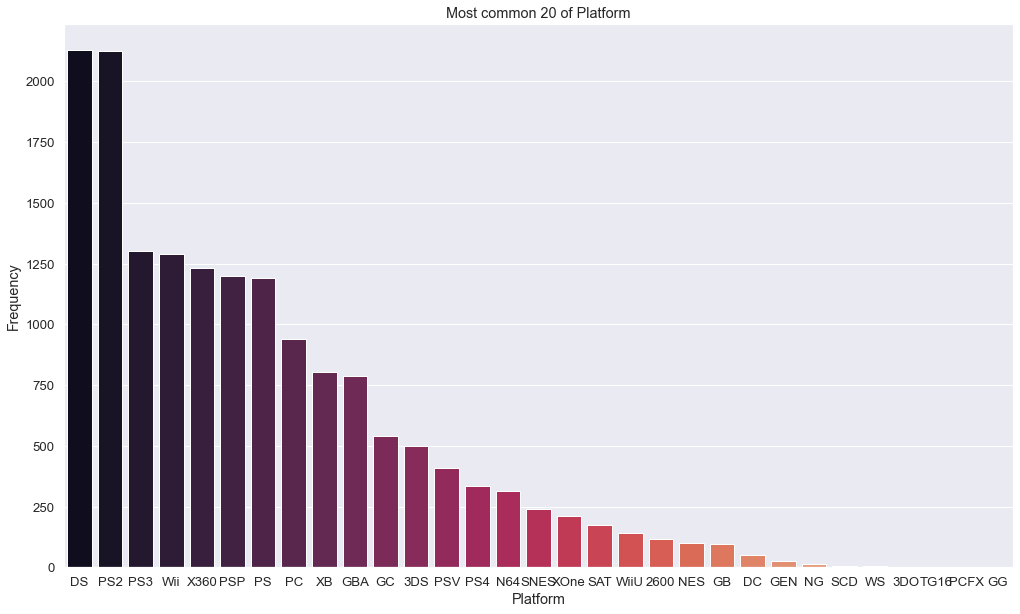

In [82]:
platform_name = list(platform.Platform)
count = list(platform['count'])
plt.figure(figsize=(17,10))
ax=sns.barplot( x = platform_name, y = count, palette = 'rocket')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.title('Most common 20 of Platform')
plt.show()

In [83]:
publisher_count = df.groupby('Publisher').size().reset_index(name = 'count')

In [84]:
publisher_count=publisher_count.sort_values('count', ascending = False).head(10)

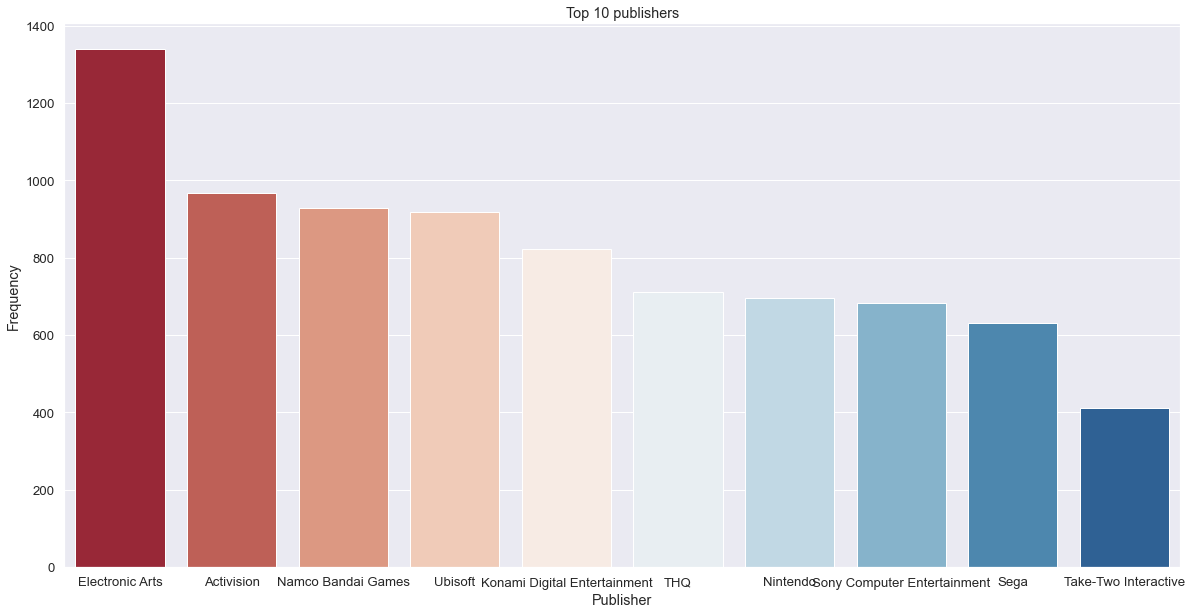

In [85]:
plt.figure(figsize = (20,10))
sns.barplot(x='Publisher', y = 'count', data = publisher_count, palette = 'RdBu')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.title('Top 10 publishers')
plt.show()


In [24]:
genre_count = df.groupby('Genre').size().reset_index(name = 'no_of_games')

In [25]:
genre_count.no_of_games.size

12

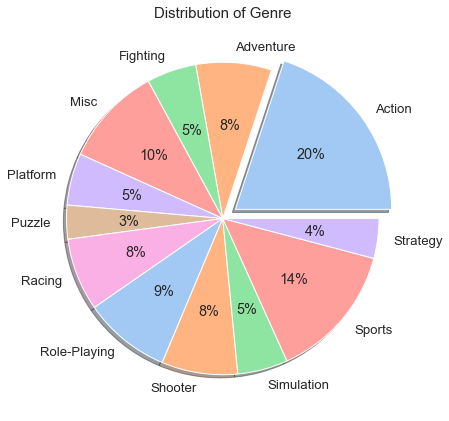

In [26]:
plt.figure(figsize = (7,10))
sns.set(font_scale= 1.2)
colors = sns.color_palette('pastel')[0:7]
explode_arr = np.zeros(genre_count.no_of_games.size)
explode_arr[0] = 0.1
plt.pie(genre_count.no_of_games, labels = genre_count.Genre, colors = colors, autopct='%.0f%%', shadow = True, explode= explode_arr)
plt.title('Distribution of Genre', fontsize = 15)
plt.show()

### Bivariate analysis


In [ ]:
sns.pairplot(df,hue = 'Genre', diag_kind= 'hist') 
plt.show()

In [ ]:
df.head()

In [ ]:
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='$ Millions', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();